In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np

## 손글씨 숫자 이미지 데이터(MNIST) 를 이용해서 숫자를 인식

(1) 문제정의

- keras를 이용해서 손글씨 숫자 이미지 인식 신경망을 설계하고 학습

(2) 데이터 수집


In [35]:
from tensorflow.keras.datasets import mnist

In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

(3) 데이터 전처리 (4) 데이터 탐색/ 시각화

In [37]:
# 데이터 크기

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

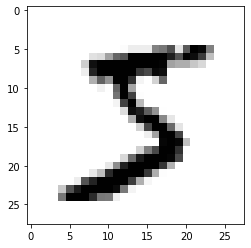

In [38]:
# 이미지 데이터 시각화

import matplotlib.pyplot as plt

digit = train_images[0]

# cmap = plt.cm.binary  : 색상을 흑백으로 출력
plt.imshow(digit, cmap = plt.cm.binary)

In [39]:
# 이미지를 사용하려면 2차원 이미지 데이터를 1차원으로 변환

train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [40]:
## 이미지의 픽셀값은   0-255로 구성
# 기계는  0 과  1 사이값으로 된 숫자로 변환해주는 것은 좋음

train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [41]:
train_images[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
train_labels.shape

(60000,)

In [43]:
import pandas as pd

## 다중분류 (10개)

# 라벨을 원핫 인코딩

train_labels_en = pd.get_dummies(train_labels)
test_labels_en = pd.get_dummies(test_labels)

train_labels_en.shape, test_labels_en.shape

((60000, 10), (10000, 10))

In [44]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [45]:
# 신경망 설계

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(784 , input_dim = 784, activation  = "relu"))

model.add(Dense( 392 , activation = "relu"))
model.add(Dense( 784 , activation = "relu"))
model.add(Dense( 392 , activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_7 (Dense)              (None, 784)               308112    
_________________________________________________________________
dense_8 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3930      
Total params: 1,542,922
Trainable params: 1,542,922
Non-trainable params: 0
_________________________________________________________________


## 6. 컴파일/학습

In [46]:
model.compile(loss= "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["acc"])

In [47]:
model.fit(train_images, train_labels_en, epochs = 10, batch_size= 128)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2677 - acc: 0.9191
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1043 - acc: 0.9707
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0735 - acc: 0.9798
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0635 - acc: 0.9834
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0568 - acc: 0.9851
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0489 - acc: 0.9874
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0452 - acc: 0.9900
Epoch 8/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0436 - acc: 0.9906
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0371 - acc: 0.9909
Epoch 10/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0348 - acc: 0.9930


In [49]:
model.evaluate(test_images, test_labels_en)

313/313 [==============================] - 1s 2ms/step - loss: 0.3733 - acc: 0.9651


[0.3732911944389343, 0.9650999903678894]